다항이 아닌 다중 회귀를 해보자
다중 회귀는 여러개의 특성으로 예측하는거야. 기존의 특성으로 새로운 특성을 만드는건 특성공학이라고 해
이번엔 numpy가 아니라 pandas로 해볼거야. 
numpy는 숫자기반 pandas는 표(숫자,날짜,문자)
numpy는 숫자연산, 행렬계산 pandas는 데이터전처리, 분석, 통계

In [24]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

#head()는 앞에서부터 5개 행을 보여줘

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [25]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)



사이킷런은 특성을 만들거나 전처리하기 위해 변환기(transformer, 클래스)를 제공함
fit(), transform()
polynomialFeatures  -> sklearn.preprocessing

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

#2와 3을 이용해 transform -> 2, 3, 2제곱, 3제곱, 2*3, 1 

[[1. 2. 3. 4. 6. 9.]]


In [27]:
poly = PolynomialFeatures(include_bias=False)
#poly에 무조건 1이 들어가는데 우린 모델링 할 때 절편이 들어갈거라 이건 계산 안해도 된다.
#include_bias=False로 설정 -> 절편(1) 제외할게~

poly.fit([[2,3]])
print(poly.transform([[2,3]]))


[[2. 3. 4. 6. 9.]]


In [28]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

#42개의 행에 9개의 복합특성(transform)이 추가되었어!
#어떻게 특성이 전처리 된거지? 한번 볼까?

poly.get_feature_names_out()

#dtype이 object인걸로 봐서 문자열이네
#길이(length), 높이(height), 폭(width) -> 3개의 특성이 있어

(42, 9)


array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [29]:
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
#0.99 나왔네!
print(lr.score(test_poly, test_target))
#0.97 나왔네

0.9903183436982125
0.9714559911594155


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
#degree=5 -> 5차항까지 만들어줘
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
#대소문자 구분하니까 제대로 넣어야 해! Poly~, False
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
#0.99 나왔네! 우와 높다
print(lr.score(test_poly, test_target))
#-144 음수? 음수우우우우? 이게 말이야? 방구야?

(42, 55)
0.9999999999938143
-144.40744533753661


특성의 개수를 늘렸더니 r2가 강력하게 나왔어 근데 test는 음수가 나왔어
이건 엄청난 과대적합이야
이럴 땐 어떻게 해야할까?
규제! regularization 해야해!!!
규제는 릿지(제곱), 라쏘(절대값)이 있어
sklearn에서는 standardscaler라고 있단다!

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#standardscaler -> 평균 0, 분산 1로 만들어줘
#드디어 릿지와 라쏘를 써볼 수 있겠네!


In [ ]:
#릿지!
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
#릿지 불러와서 릿지 적용, 그때 train_scaled는 standardscaler로 전처리해서 평균0, 분산1로 만들어진 상태
print(ridge.score(train_scaled, train_target))
#0.98나왔어
print(ridge.score(test_scaled, test_target))
#0.97나왔어
#아까 음수값에 비하면 훨씬 괜찮아졌네. 과대, 과소적합이 아닌 것 같아 이걸 어떻게 확인해보지?


0.9896101671037343
0.9790693977615375


규제 모델에 강도를 조절할 시간이야. alpha 매개변수란?
사람이 직접 지정해야 하는 매개변수로 하이퍼파라미터라고 해
적절한 alpha 값을 찾아서 적용해야 과대, 과소 에러를 피할 수 있어
그렇다면 alpha 값은 어떻게 찾지?
R2 값의 그래프를 그려서 train, test의 로그 그래프의 차이가 가장 작은 값을 찾으면 돼
이때 alpha = 0.001, 0.01, 0.1, 1, 10, 100 으로 10의 배수로 확인해 볼 수 있어


In [40]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    

alpha_list를 Ridge에 적용하는 이유는, 릿지 회귀의 규제 강도(하이퍼파라미터)인 alpha를 여러 값으로 바꿔가며 학습·평가해 보고, 어떤 alpha에서 훈련/테스트 성능이 가장 균형 잡히는지 찾기 위해서입니다.

왜 alpha를 바꾸나
Ridge의 alpha는 규제 강도입니다. 값이 클수록 계수를 더 작게 만들어 모델을 단순하게 하고 과대적합을 줄이는 대신, 너무 크면 과소적합이 됩니다.

반대로 alpha가 너무 작으면 규제가 약해져 계수가 커지고 복잡한 모델이 되어 과대적합 위험이 있습니다.

그래서 여러 후보 alpha를 시도해 훈련 점수와 테스트 점수를 비교하며 최적의 균형점을 찾습니다. 보통 테스트 점수가 가장 좋은 구간, 혹은 과대/과소적합이 최소화되는 지점을 고릅니다.

train_score.append(ridge.score(train_scaled, train_target))
이 한 줄은 아래 3단계를 “한 번에” 한 겁니다.

1. 모델 점수 계산: ridge.score(train_scaled, train_target)

Ridge 모델이 훈련 데이터에서 얼마나 잘 맞는지 R^2 값을 계산합니다.

2. 리스트에 붙일 값 준비: 위에서 나온 점수(예: 0.92)

score의 결과는 숫자 하나입니다.

3. 리스트 끝에 추가: train_score.append(그 숫자)

train_score 리스트의 “맨 뒤”에 그 점수를 1개 원소로 추가합니다.

즉, “훈련 점수를 계산해서(train_scaled vs train_target), 그 숫자를 train_score 리스트 뒤에 붙여 넣는다”입니다. 같은 방식으로 test_score.append(...)는 테스트 점수를 test_score 리스트에 차곡차곡 쌓습니다.

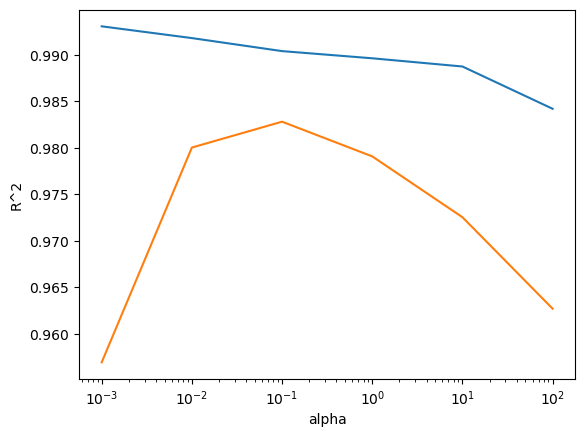

In [41]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색 : 훈련세트
주황색 : 테스트세트

근데 왜 log로 그린거야?
0.001 - 100까지니까 alpha 값이 너무 작다가 커지잖아. 그럼 왼쪽이 촘촘해져서 보기 어려워
동일한 간격으로 나타내려고 하니까 x축을 log로 나타낸거야

그래프에서 두 선이 가장 가까운 alpha 값은 0.1이야(10^-1)
그럼 이 alpha값을 어떻게 ridge에 적용해서 확인할 수 있을까?
잠시만! ridge에 모델에서 alpha=alpha라고 적용했으니까 라쏘에 적용하면 안돼!!

In [48]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
#0.99, 0.98로 나왔어 오!

0.9903815817570367
0.9827976465386995


In [49]:
#라쏘 회귀를 시작해보지!

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
#0.98, 0.98 나왔는데. 근데 여기서 왜 alpha를 지정해야하는거지?
#그냥 이대로 해도 되는거 아닌가?
#흠... alpha값 꼭 해야하나?


0.989789897208096
0.9800593698421886


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/user1/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/user1/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


여기 뜨는 에러는 convergence warning으로 
반복 제한이 낮아 최적화가 멈추기 전에 종료됨(max_iter가 작거나 기본값으로 부족한 경우).
입력 특성 스케일이 제각각이라 최적화가 어려움(특히 L1/L2 규제 모델에서 스케일 민감).
-> 여기선 신경쓰지 않아도 된다~~~

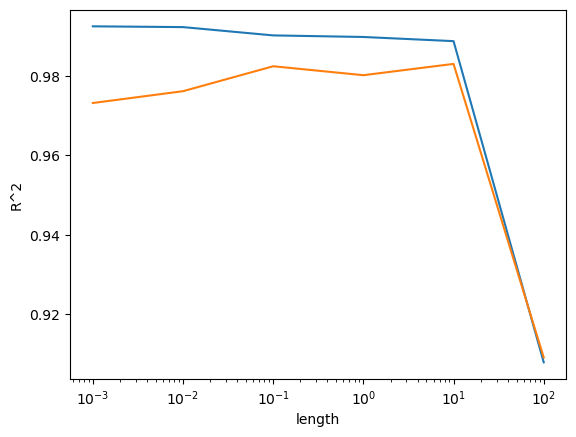

In [58]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('length')
plt.ylabel('R^2')
plt.show()

파란색 : 훈련
주황색 : 테스트
가장 가까운 곳은 alpha=10일때 근데 왜 100은 안되냐고?
이 지점은 차이가 없고 그냥 과소적합이야!
만나버리면 안된다고~

In [60]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_==0))

0.9888067471131866
0.9824470598706695
40


print(np.sum(lasso.coef==0)) 
lasso.coef값이 0이면 true로 이걸 counting 하니까 40개
55개의 특성 중 라쏘모델에 적용한건 40개를 제외한 15개!

모델 훈련 적합성을 높이기 위해 여러 특성으로 다중 회귀를 진행하고 
이때 특성을 제곱, 곱하는 등 feature engineering 해서 transform
특성의 값을 표준화하기 위해 standardscaler하여 평균 0, 분산 1 만들어줘
polynomialfeatures로 train_poly로 훈련해!
과대적합을 규제하기 위해 라쏘(제곱) 릿지(절대값) 
이때 적합한 규제를 적용하기 위해 라쏘, 릿지의 alpha 그래프를 그려서
적합한 alpha 값을 지정하여 규제 적용 
alpha값은 하이퍼파라미터라고 우리가 찾아서 지정해줘야 하는 값이야

근데.. 
뭐 데이터 전처리, 데이터 훈련 알고리즘, 규제할거(라쏘인지 릿지인지) 그리고 그에 맞는 alpha값까지

뭐든 내가 생각해서 훈련,값도출 해야한다~
그럴려면 공부를 열심히 해야한다.
코드를 외우고
어떨때 어떤 코드를 쓰는지 잘 알아둬야한다~